In [11]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math 

In [12]:
def middle(box):
    return [box[0]+(box[2]//2),box[1]+(box[3]//2)]

def decomp_row(row,size):
    row=row/math.sqrt(2)
    while size>1:
        size=size//2
        for i in range(size):
            A=row[2*i]
            B=row[2*i+1]
            row[i],row[size+i]=(A+B)/math.sqrt(2),(A-B)/math.sqrt(2)
    return row
                       
def decomp_2D(img,size):
    for i in range(size):
        img[i,:]=decomp_row(img[i,:],i)
    return img
        
def decomp_RGB(img,size):
    for i in range(3):
        img[:,:,i]=np.transpose(decomp_2D(img[:,:,i],size))
        img[:,:,i]=np.transpose(decomp_2D(img[:,:,i],size))
    return img

def Wavelet(img):
    img= cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
    
    n=min(img.shape[0],img.shape[1])
    
    size = 1
    while size < n: size *=2
    size//=2
    
    middle_x=img.shape[0]//2
    middle_y=img.shape[1]//2
    
    resized=img[middle_x-(size//2):middle_x+(size//2),middle_y-(size//2):middle_y+(size//2),:]
    
    res=decomp_RGB(resized,size)
    
    return res


(32, 32, 3)
(32, 32, 3)


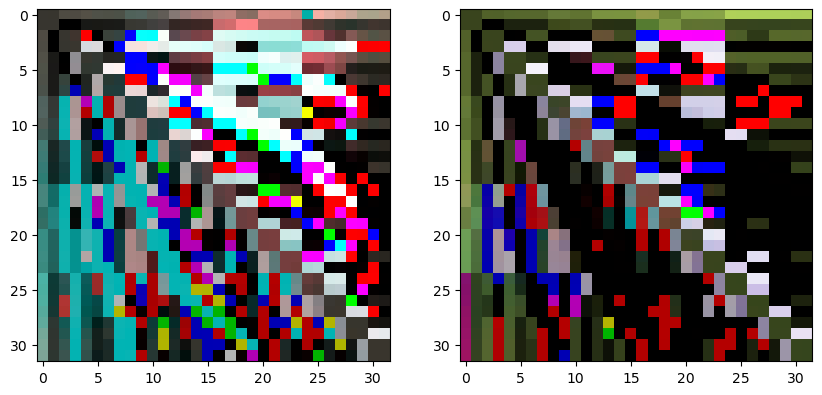

[[0.32941176 0.29542484 0.04705882]
 [0.32941176 0.29542484 0.04575163]]


In [13]:

fig = plt.figure(figsize=(10, 7))

template_test = cv2.imread('template/templateRGB_Black.png')
waveletT=Wavelet(template_test)
print(waveletT.shape)
fig.add_subplot(1,2,1)
plt.imshow(waveletT)

template_test = cv2.imread('template/templateGoal.png')
wavelet=Wavelet(template_test)
print(wavelet.shape)
fig.add_subplot(1,2,2)
plt.imshow(wavelet)

plt.show()

print(sum(waveletT[0:2,0:2,:]-wavelet[0:2,0:2,:])/(3*255))